In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data load - for initial dataset with trip ID 1 (out of 200 trips)
#Source - Kagggle Competition sponsored by AXA insurance company
d_data =  pd.read_csv("/Users/prith/Desktop/Project/Trip 1.csv", thousands = ',')

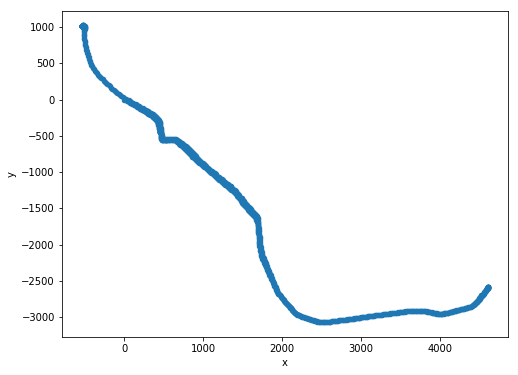

In [3]:
d_data.plot(kind = 'scatter', x = 'x', y = 'y', figsize=(8,6))
plt.show()

In [4]:
#Data Load - of features that has features drawn from all trip stats
#Note, this data has also been downloaded from the competition material itself
driver_data = pd.read_csv("/Users/prith/Desktop/Project/Driver Stats.csv", thousands = ',')
driver_data.shape

(4600, 19)

In [5]:
driver_data.head()

,Driver_id,Trip_id,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event
0,10,1,22.025986,51.479567,16.089867,1.181900,6.456999,1.773505,4351.885666,5390.362782,59.176701,87.849736,549,8.0,2.0,3.0,1,3,-6.050113
1,10,10,25.933013,47.370042,13.689941,1.105177,13.747442,1.779482,9764.480899,11708.811650,51.436036,71.703856,1011,17.0,2.0,5.0,3,11,-13.747442
2,10,100,13.319320,31.070665,10.550685,1.059753,15.378824,2.199846,400.950134,1226.884398,47.862405,101.083523,206,7.0,NaN,2.0,0,1,-13.844077
3,10,101,16.599385,41.563319,13.933061,1.580786,14.470438,2.374612,1660.095467,3614.249163,55.133316,96.266504,488,11.0,6.0,6.0,3,10,-11.376965
4,10,102,16.182505,39.469792,10.719522,1.363552,7.118497,2.925042,985.140746,1904.132677,45.000000,80.409318,264,8.0,3.0,1.0,0,6,-5.705107


In [6]:
driver_data.describe()

,Driver_id,Trip_id,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4570.000000,3679.000000,4569.000000,4600.000000,4600.000000,4600.000000
mean,17.260870,100.500000,17.143772,43.930266,12.679038,1.193506,14.586791,2.052010,3294.765953,5237.066675,65.329313,103.359228,636.169783,14.979869,3.324817,5.891223,1.112174,7.244130,-11.295638
std,8.050814,57.740582,9.736226,18.339800,4.668269,0.458221,14.345964,0.891752,3921.873153,5195.860836,34.442457,22.782350,397.501378,10.725490,2.910428,5.309694,1.611826,5.934242,7.182614
min,1.000000,1.000000,0.026113,0.448000,0.087896,0.052225,0.448000,0.125665,0.223607,2.809902,0.000000,14.581429,150.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-39.982664
25%,12.000000,50.750000,10.241975,33.437581,10.065898,0.954951,7.254335,1.572558,754.676534,1710.073161,45.000000,87.375657,322.000000,8.000000,1.000000,2.000000,0.000000,3.000000,-13.774150
50%,18.000000,100.500000,15.437727,40.985879,12.274847,1.154427,10.345544,1.924528,1704.342617,3478.840137,49.516026,105.238781,518.000000,12.000000,2.000000,4.000000,1.000000,6.000000,-8.944974
75%,24.000000,150.250000,23.640534,52.106487,15.325039,1.405204,16.314069,2.363690,4477.182222,6951.420385,73.293805,119.716872,854.000000,19.000000,4.000000,8.000000,1.000000,10.000000,-6.320108
max,30.000000,200.000000,63.739891,147.699424,31.679671,14.662127,140.534184,19.665523,28904.697760,40731.752110,180.000000,158.809584,1785.000000,73.000000,26.000000,54.000000,14.000000,43.000000,-0.316784


In [7]:
#Data Pre-processing
#Creating shuffled values between 1 and length of our dataset containing features
shuffle_index = np.random.permutation(len(driver_data))
print(type(shuffle_index), len(shuffle_index), shuffle_index)

<class 'numpy.ndarray'> 4600 [3499 2339 4324 ... 2279  558 3196]


In [8]:
#Shuffled Dataset
driver_data = driver_data.iloc[shuffle_index]
driver_data.head()

,Driver_id,Trip_id,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event
3499,26,189,37.251506,85.770943,16.009904,1.327327,56.719947,2.306723,18693.483950,20288.766690,46.041627,58.621476,1221,9.0,3.0,1.0,1,2,-9.812623
2339,20,44,31.614508,59.926594,16.746938,1.382951,10.558399,2.409965,20609.386590,24839.970320,79.330217,58.026851,1761,18.0,6.0,10.0,3,21,-10.558399
4324,30,30,15.688255,39.660021,13.155617,1.372914,11.224717,2.300713,959.097393,1366.211252,44.896391,104.889019,196,4.0,2.0,1.0,0,1,-7.334955
3238,25,133,7.919621,33.183769,9.628316,0.887031,11.076975,1.443387,120.758644,3204.503993,45.000000,117.702907,905,19.0,4.0,8.0,0,9,-10.177496
3075,24,167,17.561759,60.494931,22.425960,0.576755,6.005612,1.071390,9008.168738,9917.689521,45.000000,155.009693,1266,1.0,NaN,2.0,0,3,-4.823288


In [9]:
#Removing 1st 2 columns from initial dataset as they are of no use while performing clusters
driver_data = driver_data.iloc[:,2:]

In [10]:
#Identify the null(NaN) values and replace them with Mean value of that feature
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values="NaN", strategy="mean")
cluster_data = pd.DataFrame(imputer.fit_transform(driver_data))

In [11]:
cluster_data.columns = driver_data.columns

In [12]:
#Final processed dataset with removed 1st two columns & modified null values
cluster_data.head()

,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event
0,37.251506,85.770943,16.009904,1.327327,56.719947,2.306723,18693.483950,20288.766690,46.041627,58.621476,1221.0,9.0,3.000000,1.0,1.0,2.0,-9.812623
1,31.614508,59.926594,16.746938,1.382951,10.558399,2.409965,20609.386590,24839.970320,79.330217,58.026851,1761.0,18.0,6.000000,10.0,3.0,21.0,-10.558399
2,15.688255,39.660021,13.155617,1.372914,11.224717,2.300713,959.097393,1366.211252,44.896391,104.889019,196.0,4.0,2.000000,1.0,0.0,1.0,-7.334955
3,7.919621,33.183769,9.628316,0.887031,11.076975,1.443387,120.758644,3204.503993,45.000000,117.702907,905.0,19.0,4.000000,8.0,0.0,9.0,-10.177496
4,17.561759,60.494931,22.425960,0.576755,6.005612,1.071390,9008.168738,9917.689521,45.000000,155.009693,1266.0,1.0,3.324817,2.0,0.0,3.0,-4.823288


In [13]:
cluster_data.shape

(4600, 17)

In [14]:
#K_Means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_init=100)
labels = kmeans.fit_predict(cluster_data)

In [15]:
labels

array([1, 1, 0, ..., 1, 0, 2])

In [16]:
cluster_data["labels"] = labels
#cluster_data.labels.value_counts()

In [17]:
#Correlation among features
corr = cluster_data.corr()
corr.style.background_gradient().set_precision(2)

,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event,labels
Average Velocity (mph),1,0.69,0.78,0.35,0.22,0.25,0.71,0.72,-0.023,-0.28,0.2,-0.19,0.16,-0.23,0.34,0.28,-0.26,0.59
Max Velocity,0.69,1,0.78,0.51,0.7,0.56,0.52,0.57,0.19,-0.14,0.28,0.04,0.23,0.0027,0.46,0.4,-0.43,0.47
Velocity Stdev,0.78,0.78,1,0.38,0.27,0.32,0.53,0.55,0.045,-0.096,0.19,-0.06,0.12,-0.081,0.39,0.32,-0.3,0.5
Average Acceleration (mph per s),0.35,0.51,0.38,1,0.48,0.85,0.062,0.12,0.33,-0.018,-0.11,-0.0054,0.24,0.032,0.47,0.4,-0.41,0.099
Max Acceleration (mph per s),0.22,0.7,0.27,0.48,1,0.69,0.16,0.23,0.32,-0.014,0.16,0.12,0.23,0.08,0.39,0.3,-0.63,0.16
Acceleration Stdev,0.25,0.56,0.32,0.85,0.69,1,-0.0075,0.025,0.31,0.0082,-0.17,-0.073,0.17,-0.049,0.42,0.27,-0.53,0.026
Displacement,0.71,0.52,0.53,0.062,0.16,-0.0075,1,0.88,0.044,-0.26,0.55,0.049,0.21,-0.00035,0.27,0.35,-0.16,0.51
Total Distance Traveled,0.72,0.57,0.55,0.12,0.23,0.025,0.88,1,0.1,-0.18,0.72,0.23,0.38,0.12,0.41,0.55,-0.26,0.57
Max Direction Change per sec,-0.023,0.19,0.045,0.33,0.32,0.31,0.044,0.1,1,0.063,0.2,0.32,0.23,0.36,0.27,0.31,-0.27,0.061
Direction Stdev,-0.28,-0.14,-0.096,-0.018,-0.014,0.0082,-0.26,-0.18,0.063,1,-0.0051,0.12,-0.013,0.14,-0.023,0.018,-0.019,-0.15


In [18]:
colors = np.array([x for x in 'rgb'])
colors = np.hstack([colors] *3)

Text(0,0.5,'Total distance')

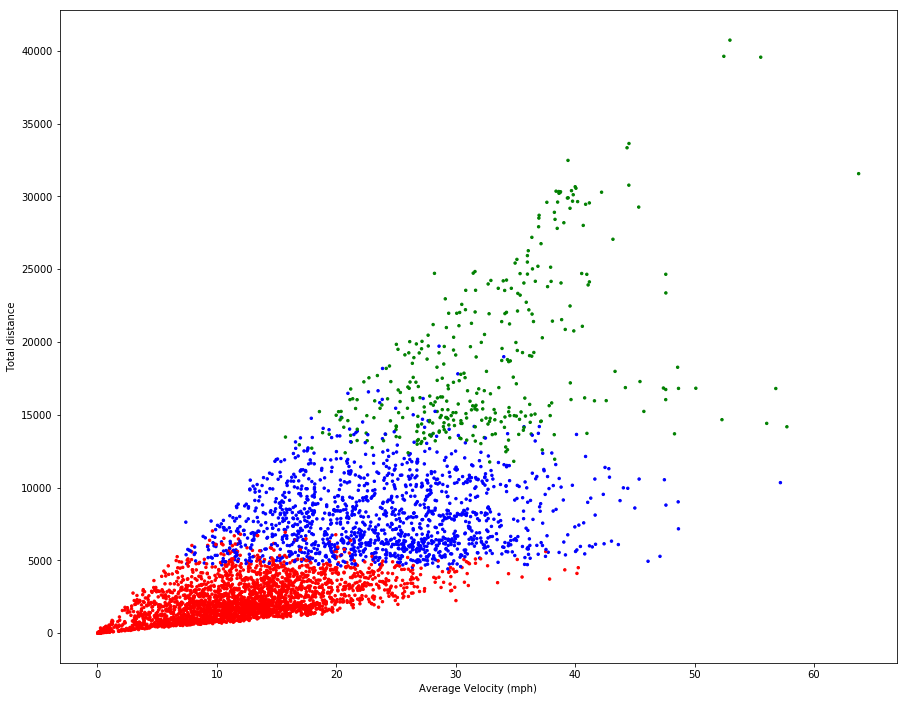

In [19]:
plt.figure(figsize=(15,12))
plt.scatter(cluster_data.iloc[:,0],cluster_data.iloc[:,7],color=colors[cluster_data["labels"]],s=6)
plt.xlabel("Average Velocity (mph)")
plt.ylabel("Total distance")
#Correlation (Avg Velocity, Total Distance) = 0.72

In [20]:
#Red   -- 0
#Blue  -- 2
#Green -- 1

Text(0,0.5,'Total Distance')

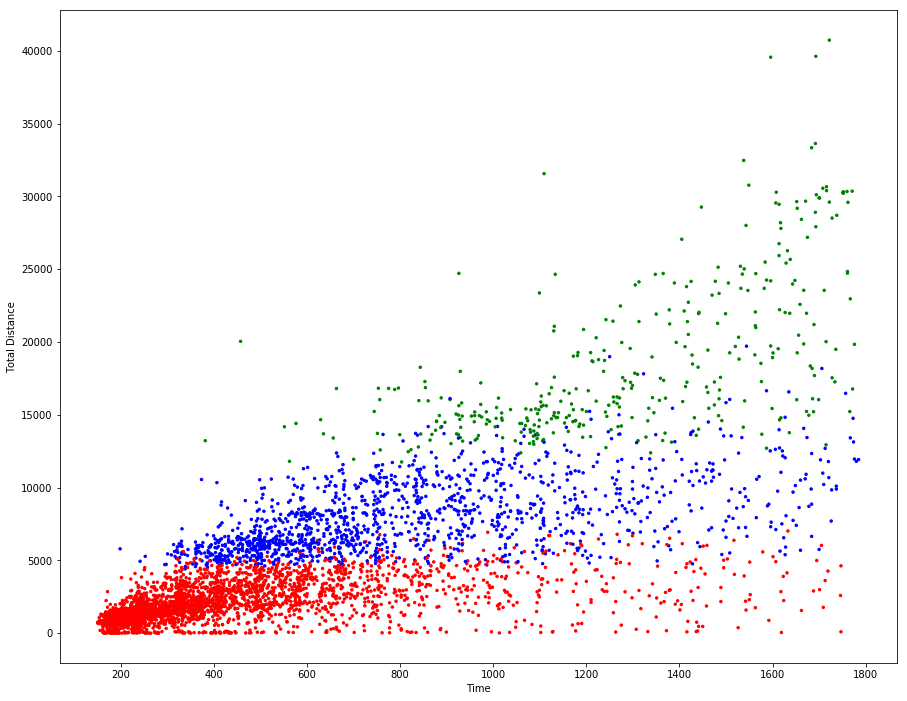

In [21]:
plt.figure(figsize=(15,12))
plt.scatter(cluster_data.iloc[:,10],cluster_data.iloc[:,7],color=colors[cluster_data["labels"]],s=6)
plt.xlabel("Time")
plt.ylabel("Total Distance")
#Correlation (Time, Total Distance) = 0.72

Text(0,0.5,'Turns')

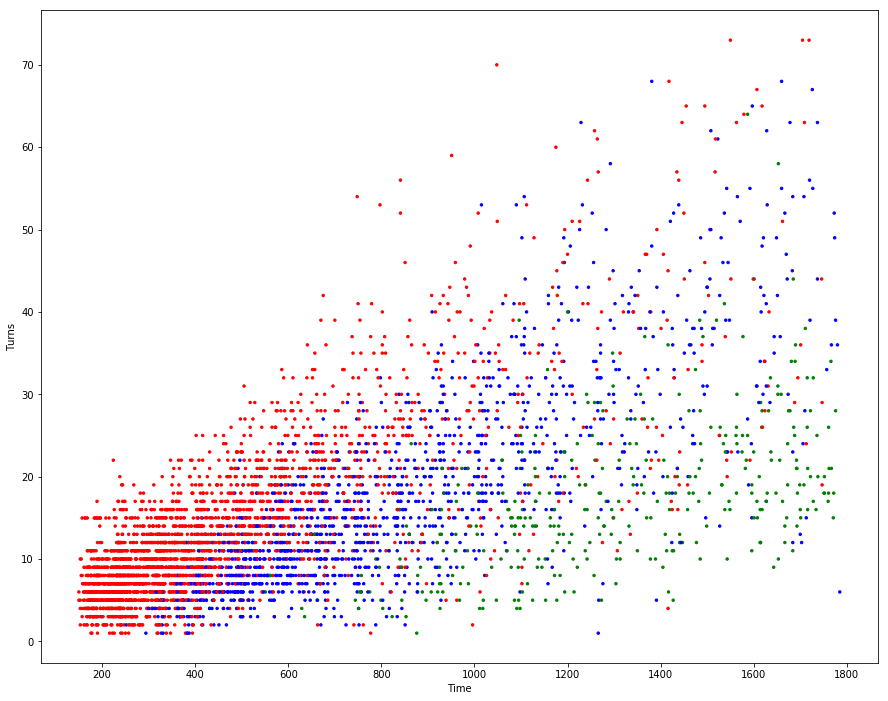

In [22]:
plt.figure(figsize=(15,12))
plt.scatter(cluster_data.iloc[:,10],cluster_data.iloc[:,11],color=colors[cluster_data["labels"]],s=6)
plt.xlabel("Time")
plt.ylabel("Turns")
#Correlation (Time, Turns) = 0.68

In [23]:
#Final processed dataset
cleaned_data = cluster_data
cluster_data.head()

,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event,labels
0,37.251506,85.770943,16.009904,1.327327,56.719947,2.306723,18693.483950,20288.766690,46.041627,58.621476,1221.0,9.0,3.000000,1.0,1.0,2.0,-9.812623,1
1,31.614508,59.926594,16.746938,1.382951,10.558399,2.409965,20609.386590,24839.970320,79.330217,58.026851,1761.0,18.0,6.000000,10.0,3.0,21.0,-10.558399,1
2,15.688255,39.660021,13.155617,1.372914,11.224717,2.300713,959.097393,1366.211252,44.896391,104.889019,196.0,4.0,2.000000,1.0,0.0,1.0,-7.334955,0
3,7.919621,33.183769,9.628316,0.887031,11.076975,1.443387,120.758644,3204.503993,45.000000,117.702907,905.0,19.0,4.000000,8.0,0.0,9.0,-10.177496,0
4,17.561759,60.494931,22.425960,0.576755,6.005612,1.071390,9008.168738,9917.689521,45.000000,155.009693,1266.0,1.0,3.324817,2.0,0.0,3.0,-4.823288,2


In [24]:
cluster_data.groupby(['labels']).agg("mean")

,Average Velocity (mph),Max Velocity,Velocity Stdev,Average Acceleration (mph per s),Max Acceleration (mph per s),Acceleration Stdev,Displacement,Total Distance Traveled,Max Direction Change per sec,Direction Stdev,Time (s),Turns,Aggressive Turns,Stops,Large Deceleration Events,Deceleration Events,Max Deceleration Event
labels,,,,,,,,,,,,,,,,,
0,11.924304,36.257737,10.628589,1.158439,12.417118,2.038574,1184.466773,2210.593083,63.462779,106.700332,461.390553,13.470728,2.725883,5.457924,0.689813,5.271061,-10.094878
1,32.538564,65.743578,17.795195,1.220701,21.403304,1.993326,13454.238193,18616.367463,70.415848,91.446398,1287.379213,17.235899,4.978153,6.123960,2.320225,12.938202,-14.726781
2,23.772829,53.881527,15.518963,1.257332,17.236885,2.093949,4979.305156,7954.248267,67.805895,99.636594,823.815920,17.451997,4.114145,6.706019,1.658138,9.781805,-12.848637


# Risk Levels
#0 - Low
#1 - High
#2 - Medium

In [25]:
#Modelling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [26]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data.iloc[:,0:16], cleaned_data.iloc[:,17],test_size=.2,random_state=42)

In [27]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3680, 16) (920, 16) (3680,) (920,)


In [28]:
#1. Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
#Code for drawing resultant decision tree and saving it to a png file
from sklearn.tree import export_graphviz
import pydotplus
import collections
from sklearn import tree

In [30]:
#This particular code has been used from example of decision tree building on a sample dataset at link
#https://pythonprogramminglanguage.com/decision-tree-visual-example/
dot_data = export_graphviz(tree_clf,
                    out_file=None,
                    feature_names=None,
                    rounded=True,
                    filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [31]:
#This particular code will create a png file by name Tree
#at the same location of this code running
#To get this code running, there needs to be an .exe file 
#installed by name graphviz-2.38, provided in project files
#Get the path for gvedit.exe here it was "C:\Program Files (x86)\Graphviz2.34\bin\"
#This path has to be added to computers path in Environment variables
#start->computer->system properties->advanced settings->environment variables->Edit User Path->Add
#Restart Python IDE

In [32]:
colors = ('lightblue', 'thistle')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
    
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

In [33]:
graph.write_png('Tree.png')

True

In [34]:
pred_tree_clf = tree_clf.predict(X_test)                                         
print(pred_tree_clf) 

[0 2 2 2 2 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 2 0 2 0 1 0 0 2 0 2 2 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 2 2 0 2 0 2 1 0 0 2 0 2 0 2 0 2 2 0 0 0 0 2 0 0 0 2 0
 0 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2 0 2 0
 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 2 2 0 2 0 0 1 0 2 2 1 2 2 2 2 0 1 0 0
 0 0 2 0 2 0 2 0 0 2 2 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0
 2 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0
 0 2 2 2 1 0 0 1 2 0 1 2 0 0 1 0 0 0 2 0 2 2 2 0 1 2 0 2 2 2 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 1 0 0 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 2 2 2 2 2 1 0 0 0 0 0 2
 2 0 0 0 2 0 0 0 0 0 2 0 2 0 2 1 0 0 2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2
 0 0 2 2 0 1 2 0 0 0 0 2 0 2 2 0 1 0 0 0 2 0 0 0 1 2 0 2 2 0 2 0 0 2 1 1 0
 0 2 0 0 0 2 0 0 0 2 2 0 2 0 2 2 2 1 1 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 2 0
 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 2 0 2 2 0 2 0
 0 2 0 0 0 0 0 2 2 2 0 0 1 0 2 0 0 2 0 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0
 0 0 0 2 2 0 0 1 1 2 0 0 

In [35]:
#Confusion Matrix, Accuracy for Decision Tree
confusion_matrix(y_test.values, pred_tree_clf)

array([[566,   0,  18],
       [  0,  52,   7],
       [  0,   0, 277]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test.values, pred_tree_clf))

0.9728260869565217


In [37]:
#2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [38]:
forest_clf = RandomForestClassifier(n_estimators=100, max_depth=7,random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [39]:
pred_forest_clf = forest_clf.predict(X_test)                                         
print(pred_forest_clf) 

[0 2 2 2 2 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 2 0 2 0 1 0 0 2 0 2 2 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 2 2 0 2 0 2 1 0 0 2 0 2 0 2 0 2 2 0 0 0 0 2 0 0 0 2 0
 0 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 2 2 0 2 0 0 2 2 0 0 0 0 2 0 2 0
 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 2 2 0 2 0 0 1 0 2 2 1 2 2 1 2 0 1 0 0
 0 0 2 0 0 0 2 0 0 2 2 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0
 2 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0
 0 2 2 2 1 0 0 1 2 0 1 2 0 0 1 0 0 0 2 0 2 2 2 0 1 0 0 0 2 2 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 1 0 0 0 0 0 2
 2 0 0 0 2 0 0 0 0 0 2 0 2 0 2 1 0 0 2 2 0 1 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2
 0 0 2 2 0 1 2 0 0 0 0 2 0 2 2 0 1 0 0 0 2 0 0 0 1 2 0 0 2 0 2 0 0 2 1 1 0
 0 2 0 0 0 2 0 0 0 2 2 0 2 0 2 2 0 1 1 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 2 2 0
 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0
 0 2 0 0 0 0 0 2 2 0 0 0 1 0 2 0 0 2 0 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0
 0 0 0 2 2 0 0 1 1 2 0 0 

In [40]:
#Confusion Matrix, Accuracy for Random Forest
confusion_matrix(y_test.values, pred_forest_clf)

array([[576,   0,   8],
       [  0,  57,   2],
       [  5,   1, 271]], dtype=int64)

In [41]:
print(accuracy_score(y_test.values, pred_forest_clf))

0.9826086956521739


In [42]:
#3. SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [43]:
poly_svc_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svc_poly", SVC(kernel="poly",degree=3,coef0=1, C=5))
    ])
poly_svc_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc_poly', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [44]:
pred_poly_svc_clf = poly_svc_clf.predict(X_test)
print(pred_poly_svc_clf)

[0 2 2 2 2 0 0 0 1 0 0 0 0 1 0 2 0 0 0 0 2 0 2 0 1 0 0 2 0 2 2 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 2 2 0 2 0 2 1 0 0 2 0 2 0 2 0 2 2 0 0 0 0 2 0 0 0 2 0
 0 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 0 2 0 2 2 0 2 0 0 2 2 0 0 0 0 2 0 2 0
 2 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 2 2 0 2 0 0 1 0 2 2 1 2 2 1 2 0 1 0 0
 0 0 2 0 0 0 1 0 0 2 2 2 2 2 0 2 0 0 2 2 0 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 0
 2 0 1 1 0 0 0 0 0 2 0 0 0 0 0 2 0 1 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0
 0 2 2 2 1 0 0 1 2 0 1 2 0 0 1 0 0 0 2 0 0 2 2 0 1 0 0 0 2 2 0 0 0 2 0 0 0
 0 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0 0 2 0 2 0 0 2 0 0 2 2 2 2 2 1 0 0 0 0 0 2
 2 0 0 0 2 0 0 0 0 0 2 0 2 0 2 1 0 0 2 2 0 1 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2
 0 0 2 2 0 1 2 0 0 0 0 2 0 0 2 0 1 0 0 0 2 0 0 0 1 2 0 0 2 0 2 0 0 2 1 1 0
 0 2 0 0 0 2 0 0 0 2 2 0 1 0 2 2 0 1 1 2 0 0 0 2 0 0 0 1 0 2 0 0 2 0 2 2 0
 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 2 0 0 0
 0 2 0 0 0 0 0 1 2 2 0 0 1 0 2 0 0 2 0 2 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0
 0 0 0 2 2 0 0 1 1 2 0 0 

In [45]:
#Confusion Matrix, Accuracy for SVC Polynomial
confusion_matrix(y_test.values, pred_poly_svc_clf)

array([[582,   0,   2],
       [  0,  58,   1],
       [  5,   5, 267]], dtype=int64)

In [46]:
print(accuracy_score(y_test.values, pred_poly_svc_clf))

0.9858695652173913
